## Description of Assignment: 
#### The objective of this assignment is to analyze datasets related to user behavior, cooking preferences, and order trends. 
#### You will work with three datasets: UserDetails, CookingSessions, and OrderDetails. 
#### The task involves cleaning and merging the data, analyzing the relationship between cooking sessions and user orders, identifying popular dishes, and exploring demographic factors that influence user behavior. 
#### Additionally, you will create visualizations to showcase key insights and write a report summarizing your findings and business recommendations. 
#### The final project should be organized in a GitHub repository with all relevant files and a README.md.

In [2]:
import pandas as pd

# Load the uploaded Excel file to inspect its structure
file_path = r"C:\Users\hritv\Downloads\Assignment.xlsx"
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure
sheet_names = excel_data.sheet_names
sheet_names


['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']

In [3]:
# Load and preview the first few rows of each sheet
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

# Display the first few rows of each sheet
user_details_head = user_details.head()
cooking_sessions_head = cooking_sessions.head()
order_details_head = order_details.head()

user_details_head, cooking_sessions_head, order_details_head


(  User ID      User Name  Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
 1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
 3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
 4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner            12  
 1      bob@email.com         Lunch             8  
 2  charlie@email.com     Breakfast            15  
 3    david@email.com        Dinner            10  
 4     emma@email.com         Lunch             9  ,
   Session ID User ID        Dish Name  Meal Type       Session Start  \
 0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
 1       S002    U002     Caesar Salad      Lunch 202

In [4]:
user_cooking = pd.merge(cooking_sessions, order_details, on='Session ID', how='inner')
user_cooking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session ID       16 non-null     object        
 1   User ID_x        16 non-null     object        
 2   Dish Name_x      16 non-null     object        
 3   Meal Type_x      16 non-null     object        
 4   Session Start    16 non-null     datetime64[ns]
 5   Session End      16 non-null     datetime64[ns]
 6   Duration (mins)  16 non-null     int64         
 7   Session Rating   16 non-null     float64       
 8   Order ID         16 non-null     int64         
 9   User ID_y        16 non-null     object        
 10  Order Date       16 non-null     datetime64[ns]
 11  Meal Type_y      16 non-null     object        
 12  Dish Name_y      16 non-null     object        
 13  Order Status     16 non-null     object        
 14  Amount (USD)     16 non-null     float64    

In [5]:
user_cooking.rename(columns={'User ID_x':'User ID'}, inplace=True)
user_cooking

,Session ID,User ID,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,User ID_y,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,NaN
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0


In [6]:
df = pd.merge(user_details, user_cooking, on='User ID', how='left')
df


,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Session Rating,Order ID,User ID_y,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1001.0,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1004.0,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1009.0,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,4.0,1002.0,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,4.3,1006.0,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0
5,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S010,...,4.1,1010.0,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0
6,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S003,...,4.8,1003.0,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN
7,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S008,...,4.4,1008.0,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,NaN
8,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S011,...,4.6,1011.0,U003,2024-12-06,Breakfast,Pancakes,Completed,8.5,Morning,4.0
9,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10,S005,...,4.7,1005.0,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape

(18, 25)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            18 non-null     object        
 1   User Name          18 non-null     object        
 2   Age                18 non-null     int64         
 3   Location           18 non-null     object        
 4   Registration Date  18 non-null     datetime64[ns]
 5   Phone              18 non-null     object        
 6   Email              18 non-null     object        
 7   Favorite Meal      18 non-null     object        
 8   Total Orders       18 non-null     int64         
 9   Session ID         16 non-null     object        
 10  Dish Name_x        16 non-null     object        
 11  Meal Type_x        16 non-null     object        
 12  Session Start      16 non-null     datetime64[ns]
 13  Session End        16 non-null     datetime64[ns]
 14  Duration (mi

In [10]:
df = df.drop(columns=['User ID_y','Dish Name_y','Meal Type_y' ])

In [11]:
df.rename(columns={'User ID_x':'User ID',"Meal Type_x":'Meal Type','Dish Name_x':'Dish Name'}, inplace=True)

In [12]:
# Standardize column names

df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df

,user_id,user_name,age,location,registration_date,phone,email,favorite_meal,total_orders,session_id,...,session_start,session_end,duration_(mins),session_rating,order_id,order_date,order_status,amount_(usd),time_of_day,rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,2024-12-01 19:00:00,2024-12-01 19:30:00,30.0,4.5,1001.0,2024-12-01,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,2024-12-02 07:30:00,2024-12-02 08:00:00,30.0,4.2,1004.0,2024-12-02,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,2024-12-05 19:00:00,2024-12-05 19:40:00,40.0,4.9,1009.0,2024-12-05,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,2024-12-01 12:00:00,2024-12-01 12:20:00,20.0,4.0,1002.0,2024-12-01,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,2024-12-03 18:30:00,2024-12-03 19:00:00,30.0,4.3,1006.0,2024-12-03,Completed,14.0,Night,4.0
5,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S010,...,2024-12-05 07:00:00,2024-12-05 07:10:00,10.0,4.1,1010.0,2024-12-05,Completed,7.0,Morning,4.0
6,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S003,...,2024-12-02 19:30:00,2024-12-02 20:10:00,40.0,4.8,1003.0,2024-12-02,Canceled,12.5,Night,NaN
7,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S008,...,2024-12-04 13:30:00,2024-12-04 13:50:00,20.0,4.4,1008.0,2024-12-04,Canceled,11.0,Day,NaN
8,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S011,...,2024-12-06 08:00:00,2024-12-06 08:30:00,30.0,4.6,1011.0,2024-12-06,Completed,8.5,Morning,4.0
9,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10,S005,...,2024-12-03 13:00:00,2024-12-03 13:15:00,15.0,4.7,1005.0,2024-12-03,Completed,9.0,Day,4.0


In [13]:
df[df.duplicated()]

,user_id,user_name,age,location,registration_date,phone,email,favorite_meal,total_orders,session_id,...,session_start,session_end,duration_(mins),session_rating,order_id,order_date,order_status,amount_(usd),time_of_day,rating


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18 non-null     object        
 1   user_name          18 non-null     object        
 2   age                18 non-null     int64         
 3   location           18 non-null     object        
 4   registration_date  18 non-null     datetime64[ns]
 5   phone              18 non-null     object        
 6   email              18 non-null     object        
 7   favorite_meal      18 non-null     object        
 8   total_orders       18 non-null     int64         
 9   session_id         16 non-null     object        
 10  dish_name          16 non-null     object        
 11  meal_type          16 non-null     object        
 12  session_start      16 non-null     datetime64[ns]
 13  session_end        16 non-null     datetime64[ns]
 14  duration_(mi

C:\Users\hritv\AppData\Local\Temp\ipykernel_30940\2554339449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['dish_name'], y=df['total_orders'], palette='viridis', legend=False)


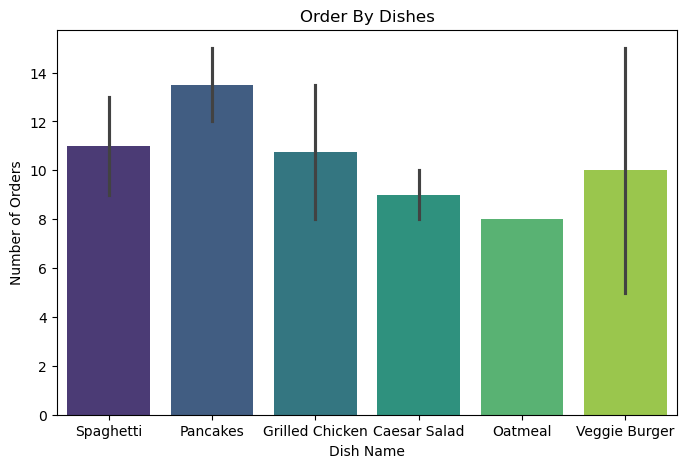

In [15]:
# Exploratory Data Analysis (EDA)
# Order By Dish
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=df['dish_name'], y=df['total_orders'], palette='viridis', legend=False)
plt.title("Order By Dishes")
plt.xlabel("Dish Name")
plt.ylabel("Number of Orders")
plt.show()

C:\Users\hritv\AppData\Local\Temp\ipykernel_30940\2689121411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['user_id'], y=df['total_orders'], palette='viridis', legend=False)


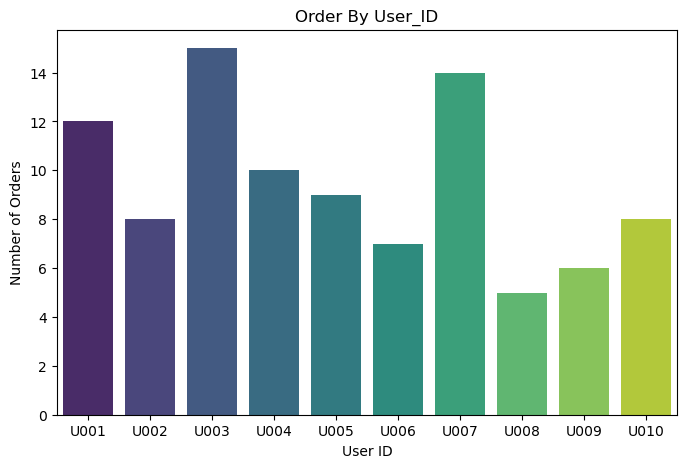

In [16]:
# Exploratory Data Analysis (EDA)
# Order By User ID
plt.figure(figsize=(8, 5))
sns.barplot(x=df['user_id'], y=df['total_orders'], palette='viridis', legend=False)
plt.title("Order By User_ID")
plt.xlabel("User ID")
plt.ylabel("Number of Orders")
plt.show()

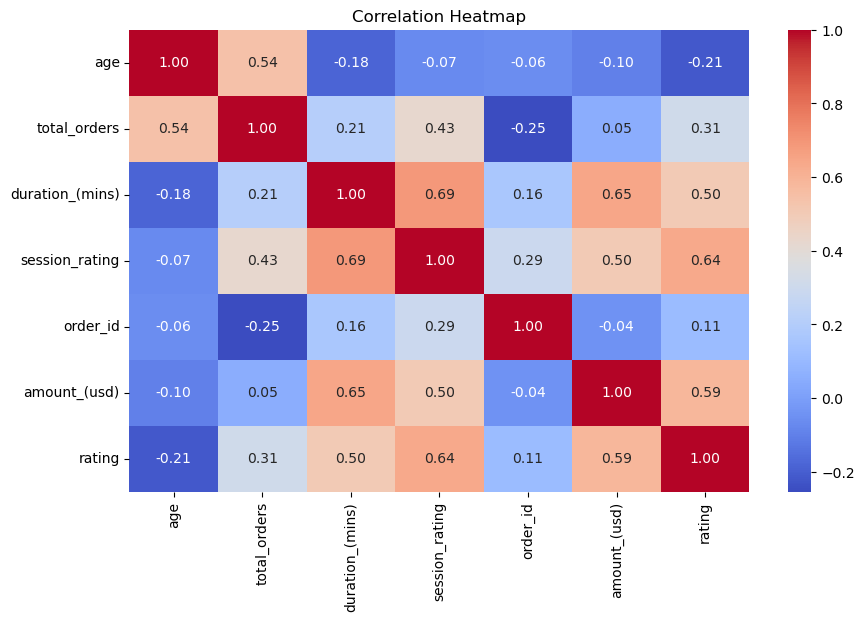

In [17]:
# Correlation heatmap
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\hritv\AppData\Local\Temp\ipykernel_30940\1251881757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['location'], y=df['total_orders'], palette='coolwarm')


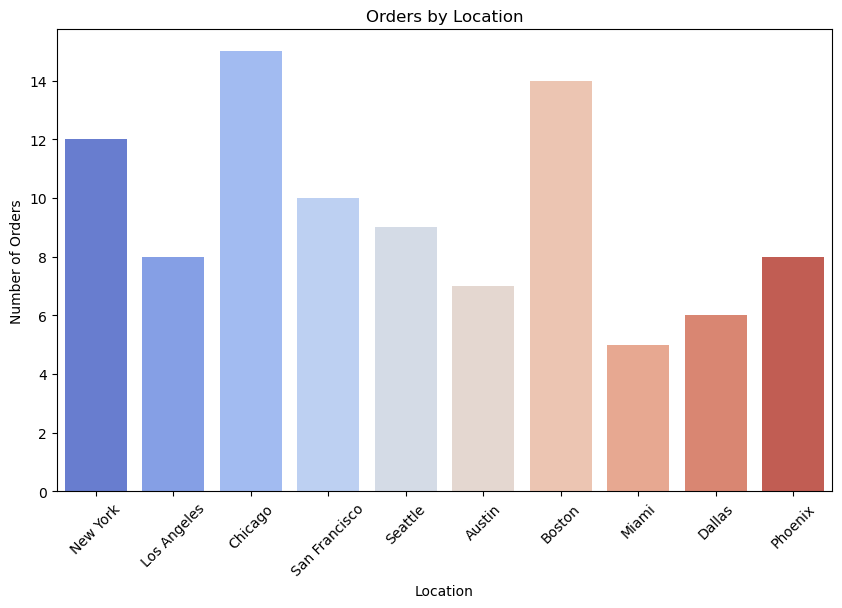

In [18]:
# Bar chart: Location and orders

plt.figure(figsize=(10, 6))
sns.barplot(x=df['location'], y=df['total_orders'], palette='coolwarm')
plt.title("Orders by Location")
plt.xlabel("Location")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

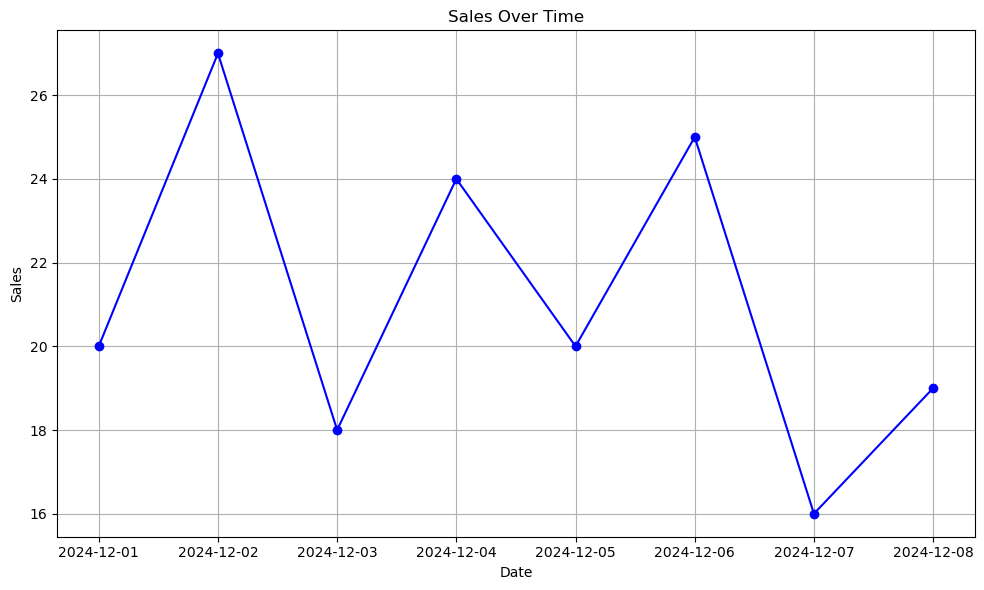

In [20]:
# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Group data by 'order_date' and aggregate the total orders
orders_over_time = df.groupby('order_date')['total_orders'].sum()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(orders_over_time.index, orders_over_time.values, marker='o', color='blue', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

## Insight
#### 1. Pancake has 13 orders, it is most oredered dish.
#### 2. Oatmeal has 8 orders, it is lowest ordered dish.
#### 3. User ID U003 got 15 orders, it is highest order.
#### 4. User ID U008 got 5 orders, it is Lowest order.
#### 5. users age orders no. is positively relative higher age user got more order than others.
#### 6. user  age and duration og cooking has negative relation, means old person takes low timing for cooking compared to younger and rating                negatively relative. 
#### 7. Expensive dishes need more time to cook.
#### 8. chigaco has 15 orders, it's highest.
#### 9. Miami has 5 orders, it's lowest.
#### 10. highest orders was 1 December.
#### 11. lowest lowest was 12 december.